<h1>CMSC 197 hw3</h1>
<h3>Jan Kristine Mosong</h3>
201950084

In [168]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

##### For Preprocessing #####
from sklearn.model_selection import train_test_split

##### For Building the Model #####
from sklearn.preprocessing import scale

##### For Validation of the Model #####
from sklearn.metrics import mean_squared_error

<h2>Load Advertising.csv dataset using pandas

In [169]:
df = pd.read_csv("Advertising.csv", index_col = 0)
print("Size of the data:", df.shape)
df.head()

Size of the data: (200, 4)


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<h2> Standardise each column of the dataset

In [170]:
df_standardised = pd.DataFrame(scale(df), columns=df.columns)
df_standardised.head()

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


<h4> Add an extra column composing of all ones to X

In [171]:
df_standardised.insert(0, "bias", 1)
df_standardised.head()

,bias,TV,radio,newspaper,sales
0,1,0.969852,0.981522,1.778945,1.552053
1,1,-1.197376,1.082808,0.669579,-0.696046
2,1,-1.516155,1.528463,1.783549,-0.907406
3,1,0.052050,1.217855,1.286405,0.860330
4,1,0.394182,-0.841614,1.281802,-0.215683


<h2>Divide the dataset into training and testing, with 0.85 and 0.25 ratio, respectively

In [172]:
x = df_standardised.drop("sales", axis=1)
y = df_standardised["sales"]
x.head()

,bias,TV,radio,newspaper
0,1,0.969852,0.981522,1.778945
1,1,-1.197376,1.082808,0.669579
2,1,-1.516155,1.528463,1.783549
3,1,0.052050,1.217855,1.286405
4,1,0.394182,-0.841614,1.281802


In [173]:
y.head()

0    1.552053
1   -0.696046
2   -0.907406
3    0.860330
4   -0.215683
Name: sales, dtype: float64

In [174]:
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.75, test_size=0.25)
print("x_train size", x_train.shape)
print("y_train size", y_train.shape)
print("x_test size", x_test.shape)
print("y_test size", y_test.shape)

x_train size (150, 4)
y_train size (150,)
x_test size (50, 4)
y_test size (50,)


<h2>Fit the model on the training set.

<h4> initialise_weights

In [175]:
def initialise_weights():
    np.random.seed(10)
    init_w = np.random.uniform(0,1,4)
    return init_w

weights = initialise_weights()
weights

array([0.77132064, 0.02075195, 0.63364823, 0.74880388])

<h4>predict

In [176]:
def predict(x, weights):
    y_hat = np.dot(x, weights)
    return y_hat

<h4>compute_cost

In [177]:
def compute_cost(y_hat, y):
    m = len(y)
    cost = (1/(2*m)) * np.dot((y_hat-y).T, (y_hat-y))
    return cost

<h4>compute_gradient

In [178]:
def compute_gradient(x, y, y_hat):
    m = len(y)
    w = 1/m * np.dot(x.T, (y_hat - y))
    return w

<h4>update_weights

In [179]:
def update_weights(weights, alpha, gradient):
    update_weights = weights - (alpha*gradient)
    return update_weights

<h4>grad_descent

In [180]:
def grad_descent(x, y, alpha, iterations):
    cost_matrix = []
    weight_matrix = []
    weights = initialise_weights()
    
    for i in range(iterations):
        y_hat = predict(x,weights)
        cost = compute_cost(y_hat,y)
        cost_matrix.append(cost)
        gradient = compute_gradient(x,y,y_hat)
        weights = update_weights(weights, alpha, gradient)
        weight_matrix.append(weights)
        
    return weight_matrix, cost_matrix

<h4>plot_costs

In [181]:
def plot_costs(costs):
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.plot(costs)
    plt.show()

<h4>Predict y for train set and calculate the cost

In [182]:
weights = initialise_weights()
y_hat_train = predict(x_train,weights)
y_train_df = pd.DataFrame({'Predicted': y_hat_train ,'Actual': y_train})
display(y_train_df)

cost_train = compute_cost(y_hat_train, y_train)
print("Cost: ", cost_train)

,Predicted,Actual
147,2.369575,2.186132
161,1.938976,-0.138825
155,-0.619063,-2.079492
197,-0.651446,-0.234898
7,-0.045274,-0.158039
...,...,...
0,2.745468,1.552053
73,0.041263,-0.580759
8,-1.186444,-1.772059
113,-0.011847,0.360753


Cost:  0.7279593196135015


<h4>Predict y for test set and calculate the cost

In [183]:
weights = initialise_weights()
y_hat_test = predict(x_test,weights)
y_test_df = pd.DataFrame({'Predicted': y_hat_test ,'Actual': y_test})
display(y_train_df)

cost_test = compute_cost(y_hat_test, y_test)
print("Cost: ", cost_test)

,Predicted,Actual
147,2.369575,2.186132
161,1.938976,-0.138825
155,-0.619063,-2.079492
197,-0.651446,-0.234898
7,-0.045274,-0.158039
...,...,...
0,2.745468,1.552053
73,0.041263,-0.580759
8,-1.186444,-1.772059
113,-0.011847,0.360753


Cost:  1.4005258656870834


<h2> Predict the quantitative response y on the train set.

In [184]:
weigths = initialise_weights()
weight_train, cost_train = grad_descent(x_train, y_train, 0.01, 10000)
y_hat_train = predict(x_train, weight_train[-1])
y_train_df = pd.DataFrame({'Predicted': y_hat_train ,'Actual': y_train})
display(y_train_df)
print("Cost: ", compute_cost(y_hat_train,y_train))
print("MSE: ", mean_squared_error(y_hat_train, y_train))

,Predicted,Actual
147,1.785449,2.186132
161,0.000454,-0.138825
155,-1.583214,-2.079492
197,-0.266705,-0.234898
7,-0.334701,-0.158039
...,...,...
0,1.247745,1.552053
73,-0.793942,-0.580759
8,-1.909536,-1.772059
113,0.429907,0.360753


Cost:  0.0347271462714057
MSE:  0.0694542925428114


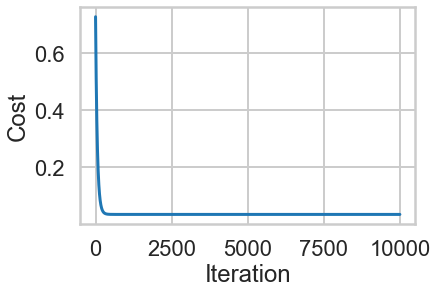

In [185]:
plot_costs(cost_train)

<h2>Predict the quantitative response y on the test set

In [186]:
weight_test, cost_test = grad_descent(x_test, y_test, 0.01, 10000)
y_hat_test = predict(x_test, weight_test[-1])
y_test_df = pd.DataFrame({'Predicted': y_hat_test ,'Actual': y_test})
display(y_test_df)
print("Cost: ", compute_cost(y_hat_test, y_test))
print("MSE: ", mean_squared_error(y_hat_test, y_test))

,Predicted,Actual
58,1.504787,1.878700
63,-0.294488,-0.004323
35,0.837325,-0.234898
19,0.002936,0.110964
59,0.818662,0.841116
56,-1.271709,-1.637558
83,-0.130423,-0.081181
105,0.686345,0.994832
121,-1.341003,-1.349340
76,-1.938462,-1.368554


Cost:  0.08387768437050655
MSE:  0.16775536874101313


<h2>Revert back a standardized data

In [187]:
df_revert = df_standardised.copy()
df_revert

,bias,TV,radio,newspaper,sales
0,1,0.969852,0.981522,1.778945,1.552053
1,1,-1.197376,1.082808,0.669579,-0.696046
2,1,-1.516155,1.528463,1.783549,-0.907406
3,1,0.052050,1.217855,1.286405,0.860330
4,1,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...,...
195,1,-1.270941,-1.321031,-0.771217,-1.234053
196,1,-0.617035,-1.240003,-1.033598,-0.830548
197,1,0.349810,-0.942899,-1.111852,-0.234898
198,1,1.594565,1.265121,1.640850,2.205347


<h2>Observe the cost results and analyse.

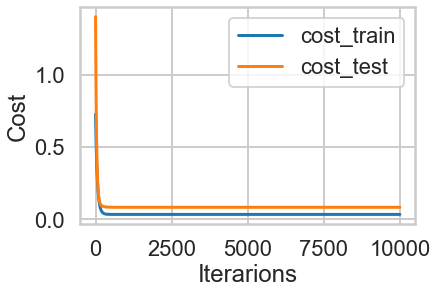

In [188]:
plt.plot(cost_train, label='cost_train')
plt.plot(cost_test, label='cost_test')

# labels for the graph
plt.xlabel('Iterarions')
plt.ylabel('Cost')
plt.legend()
plt.show()